<a href="https://colab.research.google.com/github/moonlight-aska/ChatVRM/blob/main/PyFeat_Tutorial04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Py-Feat : Python Facial Expression Analysis Toolbox
## Basic Tutorials
注) Stable v0.6.2とLatest development(v0.7.0)とでAPIの仕様が異なる. <br>
Tutorialはv0.7.0に準拠しているようなので, こちらを使用する.

## 4. Running a full analysis

In [1]:
# ライブラリのインストール
!pip install -qq scipy==1.13.1 # py-feat
!pip install -qq git+https://github.com/cosanlab/py-feat.git

  Preparing metadata (setup.py) ... done


In [2]:
import feat
feat.__version__

'0.7.0'

注) 一度インストール後, ランタイムを再起動する.

### 4.1 Download the data

In [3]:
# ライブラリのインポート
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from tqdm import tqdm
sns.set_context('talk')

In [4]:
# 処理済みデータコピー
DATA_PATH = './drive/MyDrive/Meiji/PyFeat/Tutorial04'

# !cp DATA_PATH/* .

In [5]:
# データのダウロード
files_to_download = {
    "4c5mb": 'clip_attrs.csv',
    "n6rt3": '001.mp4',
    "3gh8v": '002.mp4',
    "twqxs": '003.mp4',
    "nc7d9": '004.mp4',
    "nrwcm": '005.mp4',
    "2rk9c": '006.mp4',
    "mxkzq": '007.mp4',
    "c2na7": '008.mp4',
    "wj7zy": '009.mp4',
    "mxywn": '010.mp4',
    "6bn3g": '011.mp4',
    "jkwsp": '012.mp4',
    "54gtv": '013.mp4',
    "c3hpm": '014.mp4',
    "utdqj": '015.mp4',
    "hpw4a": '016.mp4',
    "94swe": '017.mp4',
    "qte5y": '018.mp4',
    "aykvu": '019.mp4',
    "3d5ry": '020.mp4',
}

for fid, fname in files_to_download.items():
    if not os.path.exists(fname):
        print(f'Download: {fname}')
        subprocess.run(f"wget -O {fname} --content-disposition https://osf.io/{fid}/download".split())

videos = np.sort(glob('*.mp4'))

In [6]:
# Load in attributes
clip_attrs = pd.read_csv('clip_attrs.csv')

# Add in file names and rename conditions
clip_attrs = clip_attrs.assign(
    input=clip_attrs.clipN.apply(lambda x: str(x).zfill(3) + '.mp4'),
    condition=clip_attrs['class'].replace({'gn': 'goodNews', 'ists': 'badNews'}),
)

# We're only using a subset of videos for this tutorial so drop the rest
clip_attrs = clip_attrs.query('input in @videos')

print(f'Download {len(videos)}')
print(f'Download attributes files with {clip_attrs.shape[0]} rows')

Download 20
Download attributes files with 20 rows


### 4.2 Extra facial features using Detector

In [7]:
from feat import Detector

# Initialize the default detector
detector = Detector()

# Loop over and process each video and save results to csv
for video in tqdm(videos):
    out_name = video.replace('.mp4', '.csv')
    if not os.path.exists(out_name):
        print(f'Processing: {video}')

        # This is the line that does detection and auto-saving!
        fex = detector.detect(video, data_type='video', save=out_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
100%|██████████| 20/20 [00:00<00:00, 67923.95it/s]


### 4.3 Aggregate detections using a Fex datafame

In [8]:
from feat.utils.io import read_feat

fex = pd.concat(map(lambda video: read_feat(video.replace('.mp4', '.csv')), videos))

print(f"Unique videos: {fex.inputs.unique()}")
print(f"Total prpcessed frames: {fex.shape[0]}")
print(f"Ave frame per video: {fex.groupby('input').size().mean()}")

Unique videos: ['001.mp4' '002.mp4' '003.mp4' '004.mp4' '005.mp4' '006.mp4' '007.mp4'
 '008.mp4' '009.mp4' '010.mp4' '011.mp4' '012.mp4' '013.mp4' '014.mp4'
 '015.mp4' '016.mp4' '017.mp4' '018.mp4' '019.mp4' '020.mp4']
Total prpcessed frames: 947
Ave frame per video: 47.35


In [9]:
fex.shape
fex.head()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,approx_time,Identity
0,287.0,240.0,535.0,677.0,0.999618,358.29780,366.94800,377.93344,391.41046,415.91840,...,-0.000421,-0.037026,0.068011,0.074622,001.mp4,0,1080.0,1080.0,00:00,Person_0
1,287.0,240.0,535.0,677.0,0.999617,358.31920,366.94287,377.90740,391.34520,415.82556,...,-0.000748,-0.037038,0.068044,0.074716,001.mp4,1,1080.0,1080.0,00:00,Person_0
2,289.0,240.0,538.0,677.0,0.999621,359.74940,368.13830,378.86792,391.89844,415.74847,...,-0.002017,-0.034768,0.071375,0.069939,001.mp4,2,1080.0,1080.0,00:00,Person_0
3,290.0,244.0,531.0,667.0,0.999640,361.13770,370.11557,381.58582,394.79797,418.69855,...,-0.001993,-0.041587,0.067658,0.070646,001.mp4,3,1080.0,1080.0,00:00,Person_0
4,295.0,244.0,532.0,664.0,0.999658,360.36115,369.32138,380.67178,393.90637,417.66232,...,-0.008597,-0.038519,0.076285,0.061524,001.mp4,4,1080.0,1080.0,00:00,Person_0


#### Summarize data with Fex.sessions

In [10]:
by_video = fex.update_sessions(fex['input'])

# compute the man per video
video_means = by_video.extract_mean()
video_means # 20 rows for 20 videos

,mean_FaceRectX,mean_FaceRectY,mean_FaceRectWidth,mean_FaceRectHeight,mean_FaceScore,mean_x_0,mean_x_1,mean_x_2,mean_x_3,mean_x_4,...,mean_Identity_506,mean_Identity_507,mean_Identity_508,mean_Identity_509,mean_Identity_510,mean_Identity_511,mean_Identity_512,mean_frame,mean_FrameHeight,mean_FrameWidth
001.mp4,285.600000,244.750000,531.150000,664.625000,0.999612,354.572335,363.416767,374.860485,388.215530,411.612090,...,-0.030184,-0.012015,0.006193,-0.018040,-0.031273,0.058327,0.056671,19.5,1080.0,1080.0
002.mp4,280.178571,237.142857,529.428571,664.250000,0.999544,351.288000,359.713795,370.746641,383.984308,407.267425,...,-0.032299,-0.019094,0.006791,-0.011698,-0.038386,0.063376,0.058104,13.5,1080.0,1080.0
003.mp4,272.042553,235.765957,532.936170,666.021277,0.999496,345.270735,353.077739,363.055381,374.987725,397.119537,...,-0.037146,-0.017032,-0.004549,-0.013949,-0.050276,0.064521,0.070187,23.0,1080.0,1080.0
004.mp4,259.555556,240.066667,532.688889,667.200000,0.999541,332.018383,340.835417,351.558461,364.090475,387.153689,...,-0.032819,-0.017655,0.003147,-0.001804,-0.045197,0.071553,0.067114,22.0,1080.0,1080.0
005.mp4,246.822222,261.400000,533.466667,659.111111,0.999582,313.540246,322.497218,333.826992,347.158782,370.971930,...,-0.026791,-0.015840,0.003689,-0.008845,-0.037256,0.056810,0.051813,22.0,1080.0,1080.0
006.mp4,269.312500,234.145833,529.645833,663.750000,0.999543,341.183129,348.497007,357.827385,368.993523,390.760460,...,-0.037573,-0.025429,0.005372,-0.002527,-0.038065,0.059511,0.070044,23.5,1080.0,1080.0
007.mp4,274.888889,226.629630,529.555556,671.074074,0.999575,344.082694,351.186914,360.193012,371.394850,393.464442,...,-0.039279,-0.025986,0.001048,0.000412,-0.032366,0.065912,0.066731,13.0,1080.0,1080.0
008.mp4,248.611111,231.833333,536.777778,675.166667,0.999533,323.174824,332.157151,343.116977,355.607779,377.677724,...,-0.034392,-0.009316,0.012901,-0.011055,-0.028976,0.061699,0.058203,17.5,1080.0,1080.0
009.mp4,250.238095,217.904762,538.190476,682.214286,0.999455,327.695854,336.397245,347.129691,360.063111,383.195748,...,-0.039124,-0.012394,0.002481,-0.012246,-0.032634,0.058966,0.051125,20.5,1080.0,1080.0
010.mp4,265.018519,254.462963,534.814815,655.425926,0.999518,339.137291,346.991289,357.414234,370.016054,392.975468,...,-0.032749,-0.012234,0.012197,-0.019160,-0.027277,0.035999,0.050375,26.5,1080.0,1080.0


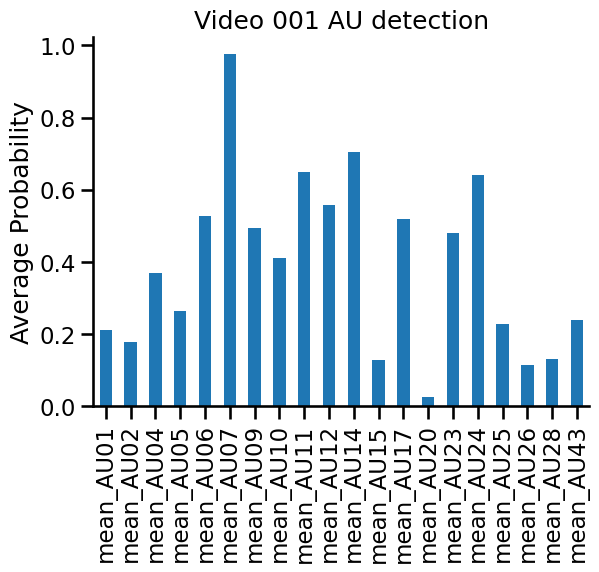

In [11]:
# Grab the aus just for video 1
video001_aus = video_means.aus.loc['001.mp4']
# video001_aus = video_means.aus.loc['001.csv'] # if loading pre-computed csv

# Plot them
ax = video001_aus.plot(kind='bar', title='Video 001 AU detection')
ax.set(ylabel='Average Probability')
sns.despine()

In [12]:
video2condition = dict(
    zip(
        # if loading pre-computed csv
        # clip_attrs['input'].str.replace('.mp4', '.csv', regex=False),
        clip_attrs['input'],
        clip_attrs['condition'],
    )
)

print(video2condition)

{'001.mp4': 'goodNews', '002.mp4': 'goodNews', '003.mp4': 'goodNews', '004.mp4': 'goodNews', '005.mp4': 'goodNews', '006.mp4': 'goodNews', '007.mp4': 'goodNews', '008.mp4': 'goodNews', '009.mp4': 'goodNews', '010.mp4': 'goodNews', '011.mp4': 'badNews', '012.mp4': 'badNews', '013.mp4': 'badNews', '014.mp4': 'badNews', '015.mp4': 'badNews', '016.mp4': 'badNews', '017.mp4': 'badNews', '018.mp4': 'badNews', '019.mp4': 'badNews', '020.mp4': 'badNews'}


#### Chaining operations

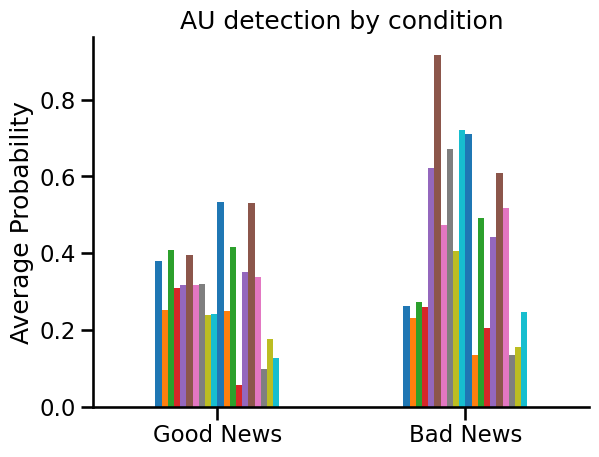

In [13]:
# Which condition each video belonged to
video2condition = dict(
    zip(
        # if loading pre-computed csv
        # clip_attrs['input'].str.replace('.mp4', '.csv', regex=False),
        clip_attrs['input'],
        clip_attrs['condition'],
    )
)

# Update sessions to group by condition, compute means (per condition), and make a
# barplot of the mean AUs for each condition
ax = (
    by_video.update_sessions(video2condition)
    .extract_mean()
    .aus.plot(kind='bar', legend=False, title='Mean AU detection by condition')
)

ax.set(ylabel='Average Probability', title='AU detection by condition', xticklabels=['Good News', 'Bad News'])
plt.xticks(rotation=0)
sns.despine()

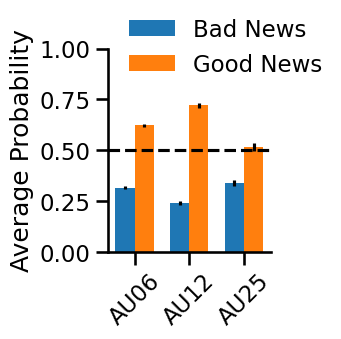

In [14]:
aus = ['AU06', 'AU12', 'AU25'] # from https://py-feat.org/pages/au_reference.html

# Update the sessions to condition compute summary stats
summary = by_video.update_sessions(video2condition).extract_summary(
    mean=True, sem=True, std=False, min=False, max=False
)

# Organize them for plotting
bad_means = summary.loc['badNews', [f'mean_{au}' for au in aus]]
bad_sems = summary.loc['badNews', [f'sem_{au}' for au in aus]]
good_means = summary.loc['goodNews', [f'mean_{au}' for au in aus]]
good_sems = summary.loc['goodNews', [f'sem_{au}' for au in aus]]

# Plot
fig, ax = plt.subplots(figsize=(3, 4))
ind = np.arange(len(bad_means))
width = 0.35
rects1 = ax.bar(ind - width / 2, bad_means, width, yerr=bad_sems, label='Bad News')
rects2 = ax.bar(ind + width / 2, good_means, width, yerr=good_sems, label='Good News')
ax.set(ylabel='Average Probability', title='', xticks=ind, xticklabels=aus, ylim=(0, 1))
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0, 1.25))
plt.axhline(0.5, ls='--', color='k')
sns.despine()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./fig_maker.au_diffs.pdf', bbox_inches='tight')

### 4.4 Comparing the condition difference across AUs using regression

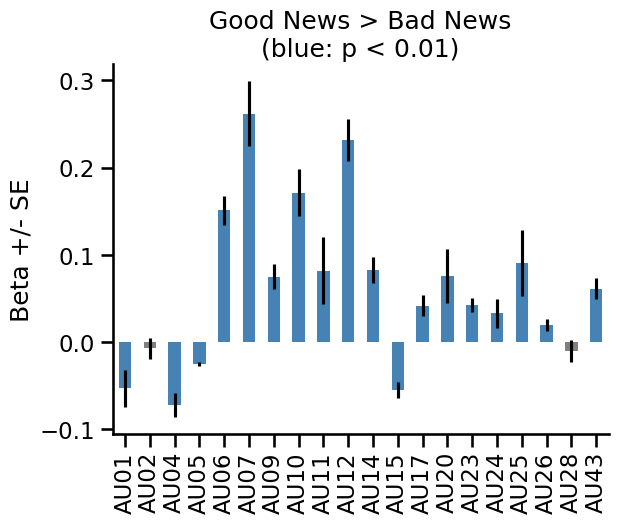

In [15]:
# Save the by_condition fex from above
by_condition = video_means.update_sessions(video2condition)

# We set numerical contrasts to compare mean good news > mean bad news
by_condition_codes = by_condition.update_sessions({'goodNews': 1., 'badNews': -1})

# Now we perform a regression (t-test) at every AU
b, se, t, p, df, residuals = by_condition_codes.regress(
    X='sessions', y='aus', fit_intercept=True
)

# We can perform bonferroni correction for multiple comparisions:
p_bonf = p / p.shape[1]

results = pd.concat(
    [
        b.round(3).loc[['sessions']].rename(index={'sessions': 'betas'}),
        se.round(3).loc[['sessions']].rename(index={'sessions': 'ses'}),
        t.round(3).loc[['sessions']].rename(index={'sessions': 't-stats'}),
        df.round(3).loc[['sessions']].rename(index={'sessions': 'dof'}),
        p_bonf.round(3).loc[['sessions']].rename(index={'sessions': 'p-values'})
    ]
)

ax = results.loc['betas'].plot(
    kind='bar',
    yerr=results.loc['ses'],
    color=[
        'steelblue' if elem else 'gray'
        for elem in results.loc['p-values'] < 0.01
    ],
    title='Good News > Bad News\n(blue: p < 0.01)',
)

xticks = ax.get_xticklabels()
xticks = [elem.get_text().split('_')[-1] for elem in xticks]

ax.set_xticklabels(xticks)
ax.set_ylabel('Beta +/- SE')
sns.despine()


### 4.5 Decoding condition from facial features

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import (
    StandardScaler,
) # always a good idea to normalize your features!
from sklearn.pipeline import make_pipeline

In [17]:
# List of different models we'll train
feature_list = ['emotions', 'aus', 'poses', 'emotions,poses', 'aus,poses']
results = []
models = {}

for features in feature_list:
    # .predict is just like .regress, but this time session is our y
    model, accuracy = by_condition.predict(
        X=features,
        y='sessions',
        model=make_pipeline(StandardScaler(), LinearDiscriminantAnalysis()),
        cv_kwargs={"cv": 10},
    )

    # Save the model
    models[features] = model

    # Save the performance for plotting
    results.append(
        pd.DataFrame(
            {'Accuracy': accuracy * 100, 'Features': [features] * len(accuracy)}
        )
    )
    # Print performance
    print(
        f"{features} model accuracy: {accuracy.mean()*100:.3g}% +/- {accuracy.std()*100:.3g}%"
    )

emotions model accuracy: 95% +/- 15%
aus model accuracy: 100% +/- 0%
poses model accuracy: 70% +/- 33.2%
emotions,poses model accuracy: 90% +/- 20%
aus,poses model accuracy: 100% +/- 0%


In [18]:
# Concat results into a single dataframe and tweak column names
results = pd.concat(results).assign(
    Features=lambda df: df.Features.map(
        {
            'emotions': 'Emotions',
            'poses': 'Pose',
            'aus': 'AUs',
            'emotions,poses': 'Emotions\n+ Pose',
            'aus,poses': 'AUs+Pose',
        }
    )
)

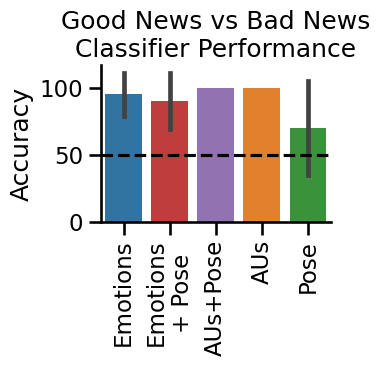

In [19]:
# Plot it
# With sns.plotting_context('talk', font_scale=1.8)
f, ax = plt.subplots(1, 1, figsize=(3.75, 4))
ax = sns.barplot(
    x='Features',
    y='Accuracy',
    errorbar='sd',
    dodge=False,
    hue='Features',
    data=results,
    ax=ax,
    order=['Emotions', 'Emotions\n+ Pose', 'AUs+Pose', 'AUs', 'Pose'],
)

# ax.get_legend().remove()
ax.set_title('Good News vs Bad News\nClassifier Performance')
ax.set(ylabel='Accuracy', xlabel='')
sns.despine()
plt.axhline(y=50, ls='--', color='k')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig(f'{DATA_PATH}/decoding_acc.pdf', bbox_inches='tight')

#### Visualizing decode weights

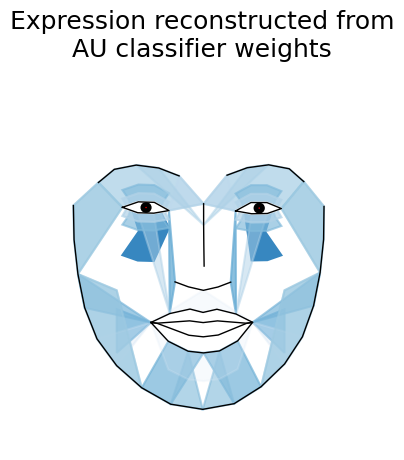

In [20]:
from feat.plotting import plot_face

plot_face(
    au=models['aus'][1].coef_.squeeze(), # the LDA coefs from the AUs pipeline model
    feature_range=(0, 1),
    muscles={'all': 'heatmap'},
    title='Expression reconstructed from\nAU classifier weights',
    title_kwargs={'wrap': False}
)

sns.despine(left=True, bottom=True)

plt.savefig(f'{DATA_PATH}/weigts.pdf', bbox_inches='tight')

In [21]:
from feat.plotting import animate_face

animation = animate_face(
    start=np.zeros(20), # start追加
    end=models['aus'][1].coef_.squeeze(), # same as before
    feature_range=(0, 1),
    muscles={'all': 'heatmap'},
    title='Good vs Bad News Classifier Weights',
    save='weights.gif',
)

### 4.6 Time-series analysis

In [22]:
# ICS returns a video x video pearson correlation matrix
isc = fex.isc(col='happiness', method='pearson')

In [23]:
def cluster_corrs(df):
    """Helper to reorder rows and cols of correlation matrix based on clustering"""

    import scipy.cluster.hierarchy as sch

    pairwise_distances = sch.distance.pdist(df)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max() / 2
    idx_to_cluster_array = sch.fcluster(
        linkage, cluster_distance_threshold, criterion='distance'
    )
    idx = np.argsort(idx_to_cluster_array)
    return df.iloc[idx, :].T.iloc[idx, :]

In [24]:
def add_cond_to_ticks(ax):
    """Helper to add condition info to each tick label"""

    xlabels, ylabels = [], []
    for xlabel, ylabel in zip(ax.get_xticklabels(), ax.get_yticklabels()):
        x_condition = video2condition[xlabel.get_text()]
        y_condition = video2condition[ylabel.get_text()]
        x_new = f"{x_condition[:-4]}_{xlabel.get_text().split('.csv')[0][1:]}"
        y_new = f"{y_condition[:-4]}_{ylabel.get_text().split('.csv')[0][1:]}"
        xlabels.append(x_new)
        ylabels.append(y_new)

    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    return ax

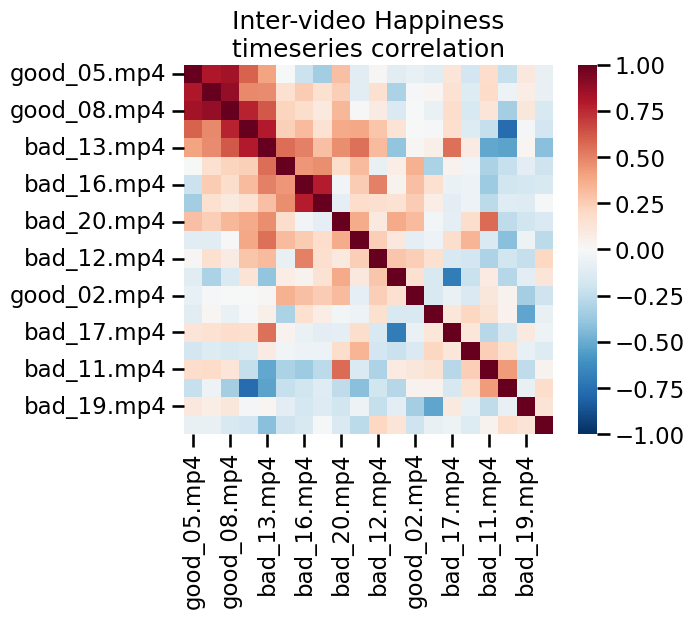

In [25]:
# Plot it
ax = sns.heatmap(
    cluster_corrs(isc),
    cmap='RdBu_r',
    vmin=-1, vmax=1,
    square=True,
)

ax = add_cond_to_ticks(ax)

ax.set(xlabel='', ylabel='', title='Inter-video Happiness\ntimeseries correlation')
plt.savefig(f'{DATA_PATH}/isc.pdf', bbox_inches='tight')